In [32]:
#Input NPM
NPM = "1706040031"

#Input NPM teman yang berkolaborasi dengan Anda dalam mengerjakan tugas ini
KOLABORATOR = []

#Input link referensi atau sumber lain yang Anda gunakan dalam menyelesaikan tugas ini
REFERENSI = [
    'https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac',
    'https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame',
    'https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f'
]

## PR 2 Linear and Logistic Regression

#### Tugas ini terdiri dari 2 bagian:

* Implementasi (Score: 50)
    * [Soal 1 - Implementasi Linear Regression](#Soal-1)
    * [Soal 2 - Analisis Linear Regression](#Soal-2)
    * [Soal 3 - Implementasi Logistic Regression](#Soal-3)
    * [Soal 4 - Analisis Logistic Regression](#Soal-4)
* Demo program (Score: 50) (jadwal demo akan diumumkan via scele)
* Dataset yang digunakan untuk Linear Regression adalah insurance.csv dan untuk Logistic Regression adalah data yang sama dengan PR 1 yaitu pasien_liver.csv

* Berikut ketentuan pengerjaan PR 2:

   - Silahkan untuk menjawab di bagian <b># YOUR CODE HERE</b>

   - Jangan mengubah class dan method yang sudah ada, tetapi Anda dipersilahkan untuk menambah parameter, variabel, atau method baru jika diperlukan

   - Library yang boleh digunakan hanya Numpy, Pandas, dan Matplotlib 

   - Berikan penjelasan singkat mengenai code yang Anda buat

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [34]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

## Soal 1 
### Linear Regression (20 poin)

* Pada soal ini Anda diminta untuk mengimplementasikan Linear Regression untuk mencari hubungan antara atribut-atribut yang ada pada data dalam mempengaruhi harga self insurance seseorang
* Data yang digunakan memiliki 5 fitur, yaitu age, sex, bmi, children, smoke. Charges adalah variabel target yang akan diprediksi

In [35]:
data_linreg = pd.read_csv("insurance.csv") #load the dataset
data_linreg.head(11110)

age     sex     bmi  children smoker      charges
0      19  female  27.900       0.0    yes  16884.92400
1      18    male  33.770       1.0     no   1725.55230
2      28    male  33.000       3.0     no   4449.46200
3      33    male  22.705       0.0     no  21984.47061
4      32    male  28.880       0.0     no   3866.85520
...   ...     ...     ...       ...    ...          ...
1333   50    male  30.970       3.0     no  10600.54830
1334   18  female  31.920       0.0     no   2205.98080
1335   18  female  36.850       0.0     no   1629.83350
1336   21  female  25.800       0.0     no   2007.94500
1337   61  female  29.070       0.0    yes  29141.36030

[1338 rows x 6 columns]

Silahkan melakukan preprocessing data. Beberapa preprocessing yang bisa dilakukan antara lain melakukan encode pada data kategori, menangani missing value, normalisasi data value, dan sebagainya

In [36]:
# PREPROCESSING DATA
from sklearn import preprocessing

data_linreg.replace({'sex' : {'female': 0, 'male': 1}}, inplace=True)
data_linreg.replace({'smoker' : {'no': 0, 'yes': 1}}, inplace=True)
data_linreg.fillna(data_linreg.mean(), inplace=True)

#data_linreg = (data_linreg-data_linreg.min())/(data_linreg.max()-data_linreg.min())
#data_linreg = (data_linreg-data_linreg.mean()) / data_linreg.std()
#x = data_linreg.values #returns a numpy array
#scaler = preprocessing.StandardScaler()
#x_scaled = scaler.fit_transform(x)
#data_linreg = pd.DataFrame(x_scaled)

data_linreg

age  sex     bmi  children  smoker      charges
0      19    0  27.900       0.0       1  16884.92400
1      18    1  33.770       1.0       0   1725.55230
2      28    1  33.000       3.0       0   4449.46200
3      33    1  22.705       0.0       0  21984.47061
4      32    1  28.880       0.0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970       3.0       0  10600.54830
1334   18    0  31.920       0.0       0   2205.98080
1335   18    0  36.850       0.0       0   1629.83350
1336   21    0  25.800       0.0       0   2007.94500
1337   61    0  29.070       0.0       1  29141.36030

[1338 rows x 6 columns]

In [37]:
data_linreg

age  sex     bmi  children  smoker      charges
0      19    0  27.900       0.0       1  16884.92400
1      18    1  33.770       1.0       0   1725.55230
2      28    1  33.000       3.0       0   4449.46200
3      33    1  22.705       0.0       0  21984.47061
4      32    1  28.880       0.0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970       3.0       0  10600.54830
1334   18    0  31.920       0.0       0   2205.98080
1335   18    0  36.850       0.0       0   1629.83350
1336   21    0  25.800       0.0       0   2007.94500
1337   61    0  29.070       0.0       1  29141.36030

[1338 rows x 6 columns]

In [38]:
# Pembagian fitur dan label
features = data_linreg.drop(["charges"], axis=1).values
label = data_linreg['charges'].values

Tanpa menggunakan library external, implementasikan fungsi hipotesis h(x)

$$ h(x) = w^Tx $$

dengan w adalah bobot dan x direpresentasikan sebagai list dengan panjang yang sama dengan w

In [39]:
def h(x):   # PASS
    global w
    sum = np.dot(np.asarray(w).T, np.asarray(x))

    return sum

In [40]:
# code ini digunakan untuk memeriksa apakah fungsi h yang Anda implementasikan sudah sesuai
w, x = [1,2,3], [2,3,4]
assert is_similar(h(x), 20)

w, x = [-1,-1,-1], [2,3,4]
assert is_similar(h(x), -9)

tanpa menggunakan library eksternal, gunakan h yang sudah diemplementasikan di atas untuk mengimplementasikan cost funtion $J(w)$ untuk Linear Regression

$$J(w) = \frac{1}{2}\sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})^2 $$

In [41]:
def cost_func_linreg(X, y): # PASS
    global w
    m = len(y)

    totalCost = 0
    for i in range(m):
        cost = (h(X[i]) - y[i])**2
        totalCost += cost
    
    totalCost /= 2

    return totalCost

In [42]:
# code ini digunakan untuk memeriksa apakah cost function yang Anda implementasikan sudah sesuai
w, X, y = [-1, 0], [[1,1],[0,1]], [-1,0]
assert is_similar(cost_func_linreg(X, y), 0)

w, X, y = [1, 1, 2], [[1,1,1],[0,0,0]], [0,0]
assert is_similar(cost_func_linreg(X, y), 8)

tanpa menggunakan library eksternal, gunakan cost function di atas untuk mengimplementasikan satu iterasi dari stochastic gradient descent

In [43]:
# lr adalah learning rate
def SGD(X, y, lr=1e-4):
    global w
    alpha, m = lr, len(y)

    for i in range(m):
        
        #for j in range(X.shape[1]):
        for j in range(len(w)):
          #prediction = 
          w[j] = w[j] + alpha*(y[i] - h(X[i]))*X[i][j]
           
          #error = y[i] - prediction
          #error = h(w, X[i]) - y[i]
          #print("i =", i)
          #print("j =", j)
          #print("w[{}] = {}".format(j, w[j]))
          #print("X[{}][{}] = {}".format(i, j, X[i][j]))
          #print("y[{}] = {}".format(i, y[i]))
          #print("prediction: ", prediction)
          #print("error: {}".format(error))
          #w[j] += alpha*(y[i] - h(w, X[i]))*X[i][j]
          #print("w[{}] after update: {}".format(j, w[j]))
          #w.T[j] = w[j] - lr*error*X[i][j]

    return w

Implementasikan fungsi is_convergent untuk menentukan termination condition (slide kuliah halaman 18). Anda bisa menambahkan parameter yang sesuai dengan termination condition yang dipilih. Fungsi ini akan mengembalikan nilai boolean termination_condition

In [44]:
def is_convergent(currentCost, nextCost, tolerance):
    termination_condition = False
    
    difference = abs(currentCost - nextCost)
    print("difference", difference)
    if difference < tolerance:
      return True
    
    return termination_condition

In [45]:
# PLAYGROUND
# you can do anything here as long as not adding any new import

#w = [1.0, 2.0, 3.0, 4.0, 5.0]
w = [1, 2, 3, 4, 5]
w = np.asarray(w)
wCopy = [1, 2, 3, 4, 5]

In [46]:
history = []
print('cost func before', cost_func_linreg(features, label))
print('weight before', w)

number_of_iteration = 1
currentCost = 0
nextCost = 1000000000000000000


# bagian ini dapat anda modifikasi sesuai dengan fungsi is_convergent yang telah dibuat diatas
while not is_convergent(currentCost, nextCost, 0.1):
#while number_of_iteration < 200:
    print("Num of iteration:", number_of_iteration)
    print("W: {}\n".format(w))
    currentCost = nextCost
    nextCost = cost_func_linreg(features, label)
    history.append(cost_func_linreg(features, label)) 
    w = SGD(features, label, lr=0.0001)
    number_of_iteration += 1

print('cost func after ' + str(number_of_iteration) + ' iteration ' + str(cost_func_linreg(features, label)))
print('weight after ' + str(number_of_iteration) + ' iteration ' + str(w))

cost func before 213261930530.54898
weight before [1 2 3 4 5]
difference 1000000000000000000
Num of iteration: 1
W: [1 2 3 4 5]

difference 9.999997867380695e+17
Num of iteration: 2
W: [226  -1 136   0 236]

difference 126875044014.73196
Num of iteration: 3
W: [226  -1 134   0 462]

difference 1130807181.4681091
Num of iteration: 4
W: [226  -1 131   0 684]

difference 1078751855.1330566
Num of iteration: 5
W: [224  -1 133   0 899]

difference 1092889908.1279297
Num of iteration: 6
W: [ 223   -1  131    0 1111]

difference 1005436218.3610077
Num of iteration: 7
W: [ 224   -1  126    0 1316]

difference 933615126.780304
Num of iteration: 8
W: [ 222   -1  126    0 1518]

difference 950947621.8538971
Num of iteration: 9
W: [ 223   -1  124    0 1717]

difference 958314294.7831268
Num of iteration: 10
W: [ 220   -1  127    0 1913]

difference 952817294.9953766
Num of iteration: 11
W: [ 220   -1  123    0 2103]

difference 814575645.6478882
Num of iteration: 12
W: [ 218   -1  124    0 2290]



In [58]:
print('\ncost/loss func plot')
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.xlabel('number of iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()


cost/loss func plot


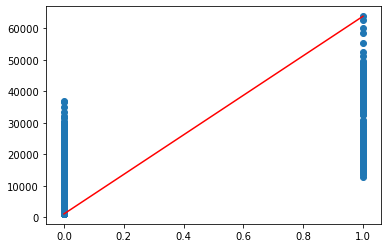

In [48]:
# visualisasikan variabel charges dan 1 fitur yang menurut Anda berpengaruh paling besar pada charges kedalam 2D plot

def linreg_plot(feature, label):
    plt.scatter(feature, label)
    plt.plot([min(feature), max(feature)], [min(label), max(label)], color='red') # predicted
    plt.show()

dt_features = pd.DataFrame(np.array(features), columns=data_linreg.columns[:-1])

# Ambil fitur yang Anda pilih dari dt_features dengan mengganti "FITUR X"
feature = dt_features['smoker'].to_numpy()
#feature = dt_features['bmi'].to_numpy()
#feature = dt_features['children'].to_numpy()
#feature = dt_features['age'].to_numpy()
#feature = dt_features['sex'].to_numpy()
linreg_plot(feature, label)

## Soal 2 
### Analisis Linear Regression (5 poin)
* Jelaskan secara singkat analisis Anda terhadap hasil Linear Regression yang didapatkan

## JAWABAN
Berdasarkan hasil, jenis kelamin dan jumlah anak yang dimiliki (hampir) tidak berpengaruh terhadap charges, sementara umur, indeks massa tubuh, dan status merokok mempengaruhi charges.

## Soal 3  
### Logistic Regression (20 poin)
* Pada soal ini Anda diminta untuk mengimplementasikan Logistic Regression untuk klasifikasi pasien liver atau non liver, jika diketahui atribut-atribut yang ada pada pasien_liver.csv

In [11]:
data_logreg = pd.read_csv("pasien_liver.csv", header=None)
data_logreg.head(10)

0       1     2     3      4      5    6    7    8     9   10
0  30  Female   0.7   0.2   63.0   31.0   27  5.8  3.4  1.40   1
1  29    Male   1.0   0.3   75.0   25.0   26  5.1  2.9  1.30   1
2  50    Male   7.3   3.7   92.0   44.0  236  6.8  1.6  0.30   1
3  45    Male   1.1   0.4   92.0   91.0  188  7.2  3.8  1.11   1
4  52    Male   1.8   0.8   97.0   85.0   78  6.4  2.7  0.70   1
5  40    Male   0.6   0.1   98.0   35.0   31  6.0  3.2  1.10   1
6  58    Male   0.4   0.1  100.0   59.0  126  4.3  2.5  1.40   1
7  72    Male   0.6   0.1  102.0   31.0   35  6.3  3.2  1.00   1
8  62    Male   5.0   2.1  103.0   18.0   40  5.0  2.1  1.72   1
9  35    Male  26.3  12.1  108.0  168.0  630  9.2  2.0  0.30   1

Silahkan melakukan preprocessing data jika diperlukan. Anda bisa menggunakan preprocessing yang telah Anda lakukan pada PR 1

In [12]:
# PREPROCESSING DATA
attributes = [
  'usia',
  'jenis kelamin',
  'TB',
  'DB',
  'AAP',
  'sgpt alamine',
  'sgot aspartate',
  'TP',
  'ALB',
  'A/G ratio',
  'class'
]

data_logreg.columns = attributes

# Menggati value 2 menjadi 1 dan 1 menjadi 0 pada kolom class
data_logreg.replace({'class' : {2: '1', 1:'0'}}, inplace=True)
data_logreg.replace({'class' : {'0': 0, '1': 1}}, inplace=True)

# Mengencode female menjadi 0 dan male menjadi 1
data_logreg.replace({'jenis kelamin' : {'Female': 0, 'Male': 1}}, inplace=True)

# Mengganti nilai NaN dengan rata-rata pada kolom.
data_logreg.fillna(data_logreg.mean(), inplace=True)

data_logreg

usia  jenis kelamin   TB   DB    AAP  sgpt alamine  sgot aspartate   TP  \
0      30              0  0.7  0.2   63.0          31.0              27  5.8   
1      29              1  1.0  0.3   75.0          25.0              26  5.1   
2      50              1  7.3  3.7   92.0          44.0             236  6.8   
3      45              1  1.1  0.4   92.0          91.0             188  7.2   
4      52              1  1.8  0.8   97.0          85.0              78  6.4   
..    ...            ...  ...  ...    ...           ...             ...  ...   
195    70              1  1.4  0.6  146.0          12.0              24  6.2   
196    24              0  0.7  0.2  188.0          11.0              10  5.5   
197    24              1  3.3  1.6  174.0          11.0              33  7.6   
198    18              1  1.3  0.7  316.0          10.0              21  6.0   
199    60              0  1.4  0.7  159.0          10.0              12  4.9   

     ALB  A/G ratio  class  
0    3.4       1.40      0  
1    2.9       1.30      0  
2    1.6       0.30      0  
3    3.8       1.11      0  
4    2.7       0.70      0  
..   ...        ...    ...  
195  3.8       1.58      1  
196  2.3       0.71      1  
197  3.9       1.00      1  
198  2.1       0.50      1  
199  2.5       1.00      1  

[200 rows x 11 columns]

In [51]:
#data_logreg['class'] = np.rint(data_logreg['class'])

#data_logreg = data_logreg.astype(np.float128)

data_logreg

usia  jenis kelamin   TB   DB    AAP  sgpt alamine  sgot aspartate   TP  \
0      30              0  0.7  0.2   63.0          31.0              27  5.8   
1      29              1  1.0  0.3   75.0          25.0              26  5.1   
2      50              1  7.3  3.7   92.0          44.0             236  6.8   
3      45              1  1.1  0.4   92.0          91.0             188  7.2   
4      52              1  1.8  0.8   97.0          85.0              78  6.4   
..    ...            ...  ...  ...    ...           ...             ...  ...   
195    70              1  1.4  0.6  146.0          12.0              24  6.2   
196    24              0  0.7  0.2  188.0          11.0              10  5.5   
197    24              1  3.3  1.6  174.0          11.0              33  7.6   
198    18              1  1.3  0.7  316.0          10.0              21  6.0   
199    60              0  1.4  0.7  159.0          10.0              12  4.9   

     ALB  A/G ratio  class  
0    3.4       1.40      0  
1    2.9       1.30      0  
2    1.6       0.30      0  
3    3.8       1.11      0  
4    2.7       0.70      0  
..   ...        ...    ...  
195  3.8       1.58      1  
196  2.3       0.71      1  
197  3.9       1.00      1  
198  2.1       0.50      1  
199  2.5       1.00      1  

[200 rows x 11 columns]

In [13]:
# Pembagian fitur dan label
#data_logreg = (data_logreg-data_logreg.mean()) / data_logreg.std()
temp = data_logreg.drop(['class'], axis=1)

classification_data = ((temp - temp.mean()) / temp.std()).values

#classification_data = data_logreg.drop(['class'], axis=1).values
classification_label = data_logreg['class'].values

In [14]:
# Rererensi perbedaan predict dan predict_proba https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/4
# Anda dapat berkreasi pada method yang Anda buat. Hint hanya untuk membantu Anda dalam pengerjaan (tidak harus sama dengan hint yang diberikan)

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __sigmoid(self, z):
      return 1 / (1 + np.exp(-z))

    def __add_intercept(self, X):
      intercept = np.ones((X.shape[0], 1))
      return np.concatenate((intercept, X), axis=1)

    def __loss(self, h, y):
      return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
          X = self.__add_intercept(X)

        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
          z = np.dot(X, self.w)
          h = self.__sigmoid(z)
          gradient = np.dot(X.T, (h - y)) / y.size
          self.w -= self.lr * gradient

          if self.verbose == True and i % 10000 == 0:
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            print('loss: {}\t'.format(self.__loss(h, y)))

    def predict_proba(self, X):
        if self.fit_intercept == True:
          X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold=0.5): # default threshold adalah 0.5
        prediction = self.predict_proba(X) >= threshold

        return prediction

In [15]:
model = LogisticRegression(0.1, 300000)
%time model.fit(classification_data, classification_label)

Wall time: 6.06 s


### Implementasi Logistic Regression Model dalam training dan testing data
* Silahkan melakukan pembagian data untuk training dan testing (default 60:40)

In [16]:
from random import seed, random
from random import randrange
from numpy import empty

# Split a dataset into a train and test set
def train_test_split(data, label, split=0.75):
    train_data = []
    train_label = []
    train_size = split * len(data)
    data_copy = data.tolist()
    label_copy = label.tolist()
    while len(train_data) < train_size:
        index = randrange(len(data_copy))
        train_data.append(data_copy.pop(index))
        train_label.append(label_copy.pop(index))
    
    train_data = np.array(train_data)
    train_label = np.array(train_label)
    data_copy = np.array(data_copy)
    label_copy = np.array(label_copy)
    return train_data, train_label, data_copy, label_copy  

In [17]:
# test train/test split
seed(5)
x_train_clf, y_train_clf, x_val_clf, y_val_clf = train_test_split(classification_data, classification_label)

In [21]:
# PLAYGROUND
# you can do anything here as long as not adding any new import

logreg_model = LogisticRegression(lr=0.04, num_iter=400000)
logreg_model.fit(x_train_clf, y_train_clf)

In [87]:
"""
# Membandingkan akurasi dengan LogisticRegression sklearn
from sklearn.linear_model import LogisticRegression 
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train_clf, y_train_clf)

predictions = logisticRegr.predict(x_val_clf)
                                   
score = logisticRegr.score(x_val_clf, y_val_clf)
print(score)
"""

0.6


## Evaluasi

In [27]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("* Confusion Matrix") 
    print(pd.DataFrame(confusion_matrix(y_test, y_pred), \
            index = ['Actual Pasien Liver', 'Actual Pasien Non-Liver'], \
            columns = ['Pred Pasiens Liver', 'Pred Pasien Non-Liver'])) 
      
    print ("\n* Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("\n* Classification Report :\n", 
    classification_report(y_test, y_pred)) 

ImportError: DLL load failed: A device which does not exist was specified.

In [22]:
logreg_y_predict = (logreg_model.predict(x_val_clf))

In [24]:
cal_accuracy(y_val_clf, logreg_y_predict)

NameError: name 'cal_accuracy' is not defined

## Soal 4  
### Analisis Logistic Regression (5 poin)
1. Jelaskan secara singkat analisis Anda terhadap hasil Logistic Regression yang didapatkan
2. Jelaskan secara singkat perbedaan hasil evaluasi dari Decision Tree pada PR 1 dan Logistic Regression yang didapatkan pada soal 3 dan mengapa perbedaan tersebut bisa terjadi

## JAWABAN
1. 
2. Hasil akurasi dari Decision Tree saya lebih akurat dibanding Logistic Regression